Taken in part from the course [Creative applications of deep learning with tensorflow](https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow-i)

- [Regression to a noisy sine wave](#regression-1d)
    - [L1 minimization with SGD](#L1-SGD)
    - [Linear regression iterations](#regression-1d-sine)
    - [Regression by a cubic polynomial](#cubic-regression)
    - [Non linear activation](#non-linear-activation)
    - [Simple network with a non linear activation](#net-with-non-linear-activation)
    - [Going deeper](#going-deeper)
- [Painting an image](#paint-image)
- [Homework](#homework)

In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

<a name="regression-1d"></a>
# Regression to a sine wave

### Creating the dataset

In [2]:
#---------------------------------------------
# Create the data set: Sine wave with noise
#--------------------------------------------
n_observations = 1000
xs             = np.linspace(-3, 3, n_observations)
ys             = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
#plt.scatter(xs, ys, alpha=0.15, marker='+')


<a name="L1-SGD"></a>
### The training procedure: L1 minimization with batch stochadtic GD

In [3]:
# L1 cost function
def distance(p1, p2):
    return tf.abs(p1 - p2)

def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost      = tf.reduce_mean(distance(Y_pred, Y))  # cost ==> mean L1 distance for alls samples
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)


    # Plot the true data distribution
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set `W` and `b` to their initial random normal value.
        sess.run(tf.initialize_all_variables())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / float(n_iterations))
                
                # getting the values as numpy array
                #    w =  sess.run(W, feed_dict={X: xs, Y: ys})
                #    b =  sess.run(B, feed_dict={X: xs, Y: ys})
                print ' iteration: {:3} Cost: {} '.format(it_i,training_cost)
                                                                       
                                                                        

    fig.show()
    plt.draw()
    



<a name="regression-1d-sine"></a>
### Linear regression

 iteration:   0 Cost: 1.02243745327 
 iteration:  10 Cost: 0.676981925964 
 iteration:  20 Cost: 0.479605644941 
 iteration:  30 Cost: 0.427596181631 
 iteration:  40 Cost: 0.414617389441 
 iteration:  50 Cost: 0.410947740078 
 iteration:  60 Cost: 0.410117208958 
 iteration:  70 Cost: 0.40997043252 
 iteration:  80 Cost: 0.409941107035 
 iteration:  90 Cost: 0.40993231535 


/home/shmuel/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


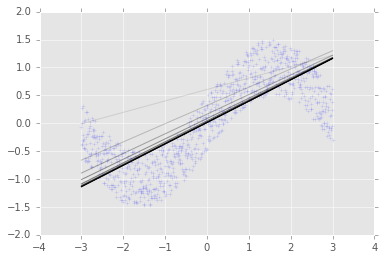

In [4]:
# Reset default graph
tf.reset_default_graph()

# Declare variables 
# placeholders to hold input data
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Variables for internal weights
W         = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')
B         = tf.Variable(tf.constant([1], dtype=tf.float32), name='bias')
Y_pred    = X * W + B

train(X,Y,Y_pred)

<a name="cubic-regression"></a>
### Cubic polynomial regression

 iteration:   0 Cost: 1.03337597847 
 iteration:  10 Cost: 0.503705084324 
 iteration:  20 Cost: 0.405008226633 
 iteration:  30 Cost: 0.295544326305 
 iteration:  40 Cost: 0.278240144253 
 iteration:  50 Cost: 0.28860899806 
 iteration:  60 Cost: 0.261719107628 
 iteration:  70 Cost: 0.283545523882 
 iteration:  80 Cost: 0.266137629747 
 iteration:  90 Cost: 0.311225652695 


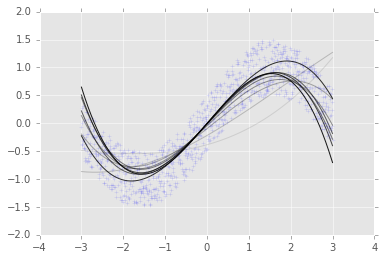

In [5]:
# Reset default graph
tf.reset_default_graph()

# Declare variables 
# placeholders to hold input data
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Variables for internal weights
B         = tf.Variable(tf.constant([1], dtype=tf.float32), name='bias')
Y_pred    = tf.Variable(tf.random_normal([1]), name='bias')

for pow_i in range(0, 4):
    # Instantiate weight for each monomial
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.mul(tf.pow(X, pow_i), W), Y_pred)


train(X,Y,Y_pred)

<a name="non-linear-activation"></a> 
## Non linear activation

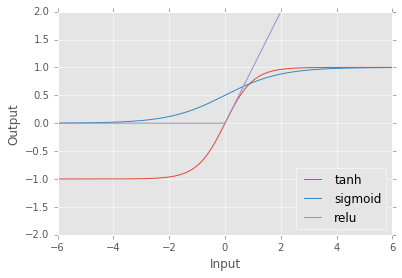

In [6]:
# Reset default graph
tf.reset_default_graph()

sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

<a name="net-with-non-linear-activation"></a> 
## Simple network with tanh non linear activation

 iteration:   0 Cost: 0.303072452545 
 iteration:  10 Cost: 0.274794787169 
 iteration:  20 Cost: 0.2725712955 
 iteration:  30 Cost: 0.27083954215 
 iteration:  40 Cost: 0.269666045904 
 iteration:  50 Cost: 0.268798857927 
 iteration:  60 Cost: 0.268146961927 
 iteration:  70 Cost: 0.267559617758 
 iteration:  80 Cost: 0.266988933086 
 iteration:  90 Cost: 0.266578555107 


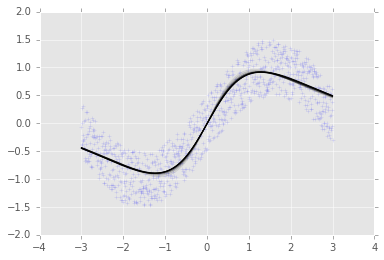

In [7]:
X         = tf.placeholder(tf.float32, name='X')
Y         = tf.placeholder(tf.float32, name='Y')     

#---------------------------------------------------------------------------
# Create inner layer of 10 neurons followed by non-linear activation
#  W  : 1 x n_neurons         martix
#  b  : n_neurons             vector
#
#  X  : n_vals                Input vector of values
#  Y  : n_vals                Input noisy values of sin(X)
#
# For a single input value x_i we do:
#      h_k(x_i)= h(x_i * w_k + b_k) , k=1,...,n_neuorns
# In vector notations
#  (1)    h       = x_i * W + b
# where h is the non-linear activation function.
#  (2)   y_pred_i = h_1 + h_2  + .... + h_n_neurons
#
# From single input/output value to a vector
# -------------------------------------------
# Consider now a vector of input valuse: X = (x_1,...,x_n_vals)^T
# Let us expand this vector to a column matrix XM = f.expand_dims(X, 1)
# Then,instead of the single vector in (1) we have a matrix of n_vals x n_neurons entries
#       H = matmul(XM,W) 
# which we sum, row by row, as in (2) to get the prediction vector Y_PRED
#---------------------------------------------------------------------------
n_neurons = 10
W         = tf.Variable(tf.random_normal([1, n_neurons]), name='W')
b         = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')
h         = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h')
Y_pred    = tf.reduce_sum(h, 1)

#with tf.Session() as sess:
#    sess.run(tf.initialize_all_variables())
#    print 'Shape of H 111 x 10',sess.run(h, feed_dict={X: xs[0:111], Y: ys[0:111]}).shape


# And retrain w/ our new Y_pred
train(X, Y, Y_pred)

<a name="going-deeper"></a> 
## Going deeper

In [8]:
# Define a single hidden layer with activation function
# Creating variables with scopes help in further debugging
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        # Create/return variable with a given scope
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [9]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
print 'Empty graph: ',[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 1, 10, scope='layer1')

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    print 's',sess.run(h, feed_dict={X: np.expand_dims(xs[:111],1)}).shape

# See the names of any operations in the graph
print 'Graph of first layer with 2 input and 10 neurons: '
for op in [op.name for op in tf.get_default_graph().get_operations()]:
    print '  ',op

Empty graph:  []
s (111, 10)
Graph of first layer with 2 input and 10 neurons: 
   X
   layer1/W
   layer1/W/Initializer/random_normal/shape
   layer1/W/Initializer/random_normal/mean
   layer1/W/Initializer/random_normal/stddev
   layer1/W/Initializer/random_normal/RandomStandardNormal
   layer1/W/Initializer/random_normal/mul
   layer1/W/Initializer/random_normal
   layer1/W/Assign
   layer1/W/read
   layer1/b
   layer1/b/Initializer/Const
   layer1/b/Assign
   layer1/b/read
   layer1/MatMul
   layer1/add
   init


Exception AssertionError: AssertionError("Nesting violated for default stack of <type 'weakref'> objects",) in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f630c24ef50>> ignored


Dimension of prediction vector is:  (111, 1)
 iteration:   0 Cost: 0.627249896526 
 iteration:  10 Cost: 0.349437206984 
 iteration:  20 Cost: 0.331162840128 
 iteration:  30 Cost: 0.317272901535 
 iteration:  40 Cost: 0.306638360023 
 iteration:  50 Cost: 0.297720938921 
 iteration:  60 Cost: 0.290564805269 
 iteration:  70 Cost: 0.285026907921 
 iteration:  80 Cost: 0.281105488539 
 iteration:  90 Cost: 0.278399497271 
 iteration: 100 Cost: 0.276419937611 
 iteration: 110 Cost: 0.274526357651 
 iteration: 120 Cost: 0.27323371172 
 iteration: 130 Cost: 0.272040456533 
 iteration: 140 Cost: 0.270173102617 
 iteration: 150 Cost: 0.269240885973 
 iteration: 160 Cost: 0.268115818501 
 iteration: 170 Cost: 0.266934007406 
 iteration: 180 Cost: 0.266102910042 
 iteration: 190 Cost: 0.265246897936 
 iteration: 200 Cost: 0.264607310295 
 iteration: 210 Cost: 0.265603929758 
 iteration: 220 Cost: 0.263047337532 
 iteration: 230 Cost: 0.265513122082 
 iteration: 240 Cost: 0.26206690073 
 iterat

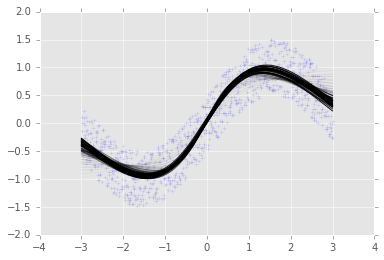

In [10]:
ops.reset_default_graph()
g  = tf.get_default_graph()

n_observations = 1000
xs             = np.linspace(-3, 3, n_observations)
ys             = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
xs             = xs.reshape(n_observations,1)
ys             = ys.reshape(n_observations,1)


X         = tf.placeholder(tf.float32, shape=[None,1],name='X')
Y         = tf.placeholder(tf.float32, shape=[None,1],name='Y')     

n_inputs  = 1
n_neurons = 10
h1        = linear(X,   n_inputs,   n_neurons, activation=tf.nn.tanh, scope='layer1')
h2        = linear(h1,  n_neurons,  n_neurons, activation=tf.nn.tanh, scope='layer2')
Y_pred    = linear(h2, n_neurons, 1, scope='layer3')

#Y_pred = linear(h2, 10,  1, scope='layer3')

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    print 'Dimension of prediction vector is: ',sess.run(Y_pred, feed_dict={X: xs[0:111]}).shape


# And retrain w/ our new Y_pred
train(X, Y, Y_pred,n_iterations=500, batch_size=30, learning_rate=0.055)

<a name="paint-image"></a> 
## Painting and image

(4096, 2) (4096, 3)


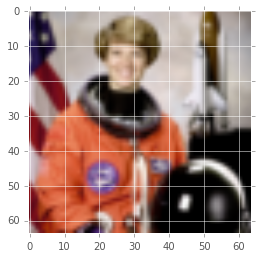

In [11]:
from skimage.data import astronaut
from scipy.misc import imresize
img = imresize(astronaut(), (64, 64))
plt.imshow(img)

# Input vector of pixel locations
# output pixel values (RGB)
xs = []
ys = []

for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        xs.append([row_i, col_i])
        ys.append(img[row_i, col_i])

xs = np.array(xs)
ys = np.array(ys)

xs = (xs - np.mean(xs)) / np.std(xs)

print xs.shape, ys.shape

## Create the deep network

In [12]:
ops.reset_default_graph()
g  = tf.get_default_graph()

n_neurons = [2, 64, 64, 64, 64, 64, 64, 3]

X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

(99, 79.18663)


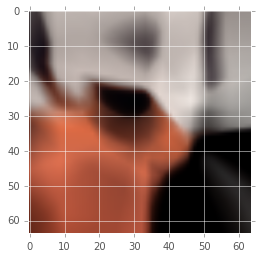

(199, 55.789116)


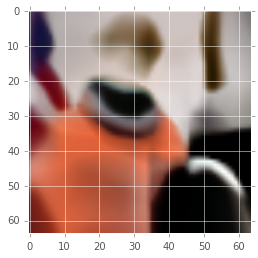

(299, 47.200172)


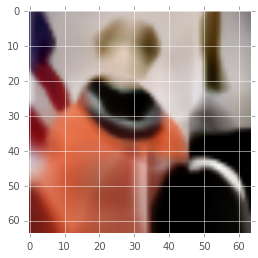

(399, 46.760895)


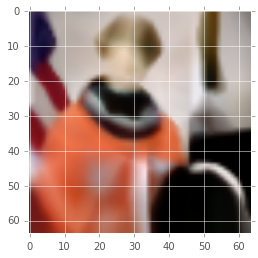

(499, 40.484005)


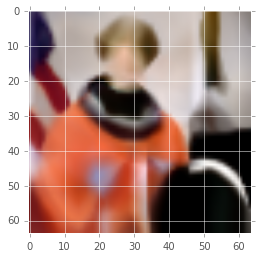

In [13]:
cost      = tf.reduce_mean(tf.reduce_sum(distance(Y_pred, Y), 1))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.initialize_all_variables())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        if (it_i + 1) % 100 == 0:
            print(it_i, training_cost)

            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()

<a name="homework"></a>
## Homework

Use [get_variables](https://www.tensorflow.org/versions/r0.10/api_docs/python/state_ops.html#get_variable) to create a variable (within a scope) or get an existing variable.

Another way of predicting color of a pixel

### Taken from course

Now that we've done all of this work, let's stick it inside a function.This does not require you to specify `n_input`, and the input `scope` is called `name`.  It also has a few more extras in there including automatically converting a 4-d input tensor to a 2-d tensor so that you can fully connect the layer with a matrix multiply 

In [14]:
def linear(x, n_output, name=None, activation=None, reuse=None):
    """Fully connected layer.

    Parameters
    ----------
    x : tf.Tensor
        Input tensor to connect
    n_output : int
        Number of output neurons
    name : None, optional
        Scope to apply

    Returns
    -------
    op : tf.Tensor
        Output of fully connected layer.
    """
    if len(x.get_shape()) != 2:
        x = flatten(x, reuse=reuse)

    n_input = x.get_shape().as_list()[1]

    with tf.variable_scope(name or "fc", reuse=reuse):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            dtype=tf.float32,
            initializer=tf.contrib.layers.xavier_initializer())

        b = tf.get_variable(
            name='b',
            shape=[n_output],
            dtype=tf.float32,
            initializer=tf.constant_initializer(0.0))

        h = tf.nn.bias_add(
            name='h',
            value=tf.matmul(x, W),
            bias=b)

        if activation:
            h = activation(h)

        return h, W


def flatten(x, name=None, reuse=None):
    """Flatten Tensor to 2-dimensions.

    Parameters
    ----------
    x : tf.Tensor
        Input tensor to flatten.
    name : None, optional
        Variable scope for flatten operations

    Returns
    -------
    flattened : tf.Tensor
        Flattened tensor.
    """
    with tf.variable_scope('flatten'):
        dims = x.get_shape().as_list()
        if len(dims) == 4:
            flattened = tf.reshape(
                x,
                shape=[-1, dims[1] * dims[2] * dims[3]])
        elif len(dims) == 2 or len(dims) == 1:
            flattened = x
        else:
            raise ValueError('Expected n dimensions of 1, 2 or 4.  Found:',
                             len(dims))

        return flattened

# transofrm image to two lists
def split_image(img):
    xs = []
    ys = []

    for row_i in range(img.shape[0]):
        for col_i in range(img.shape[1]):
            xs.append([row_i, col_i])
            ys.append(img[row_i, col_i])

    xs = np.array(xs)
    ys = np.array(ys)
    return xs, ys

### Preparing the data

In [15]:
# First load an image
img = plt.imread('./celebs/000001.jpg')

img = imresize(img, (100, 100))
plt.figure(figsize=(5, 5))
#plt.imshow(img)

xs, ys = split_image(img)
print xs.shape,ys.shape

# normalize
mean_xs = np.mean(xs, axis=0)
std_xs  = np.std(xs, axis=0)
xs      = (xs-mean_xs)/std_xs
ys      = ys/255.0

# Just to make sure you have normalized it correctly:
print(np.min(xs), np.max(xs))
print(np.min(ys), np.max(ys))

assert(np.min(xs) > -3.0 and np.max(xs) < 3.0)

#plt.imshow(ys.reshape(img.shape))

(10000, 2) (10000, 3)
(-1.7148160424389376, 1.7148160424389376)
(0.0, 1.0)


### A network with 6 hidden layers

In [16]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')


n_neurons = 20

h1, W1 = linear(X,  n_neurons, name='layer1', activation=tf.nn.tanh, reuse=None)
h2, W2 = linear(h1, n_neurons, name='layer2', activation=tf.nn.tanh, reuse=None)
h3, W3 = linear(h2, n_neurons, name='layer3', activation=tf.nn.tanh, reuse=None)
h4, W4 = linear(h3, n_neurons, name='layer4', activation=tf.nn.tanh, reuse=None)
h5, W5 = linear(h4, n_neurons, name='layer5', activation=tf.nn.tanh, reuse=None)
h6, W6 = linear(h5, n_neurons, name='layer6', activation=tf.nn.tanh, reuse=None)

Y_pred, W7 = linear(h6, 3, activation=None, name='pred')

In [17]:
assert(X.get_shape().as_list() == [None, 2])
assert(Y_pred.get_shape().as_list() == [None, 3])
assert(Y.get_shape().as_list() == [None, 3])

### Defining the cost function

In [18]:
sub       = Y - Y_pred                                   # 3D errorvector
error     = sub * sub
error     = tf.abs(sub)
sum_error = tf.reduce_sum(error,reduction_indices=1)      # Sum over color channels
cost      = tf.reduce_sum(sum_error,reduction_indices=0)  # Sum over mini-batches
assert(error.get_shape().as_list() == [None, 3])
assert(sum_error.get_shape().as_list() == [None])
assert(cost.get_shape().as_list() == [])

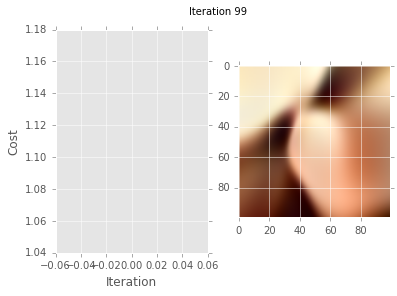

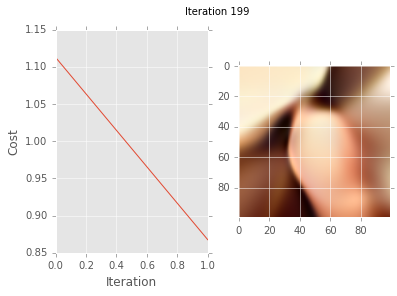

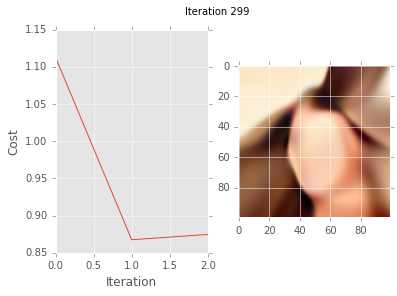

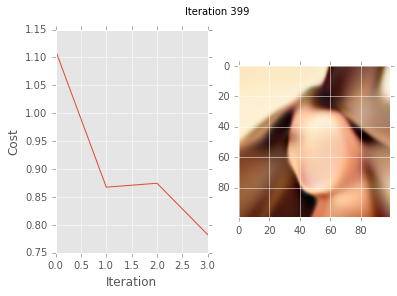

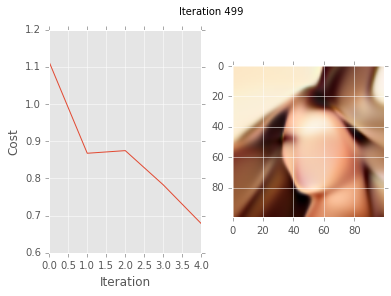

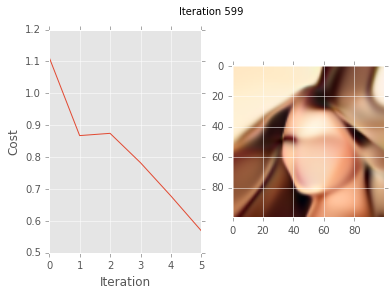

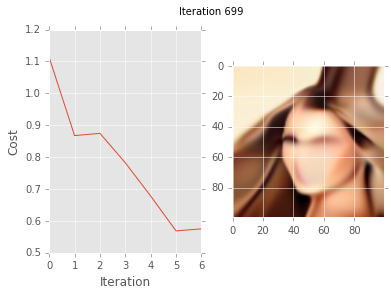

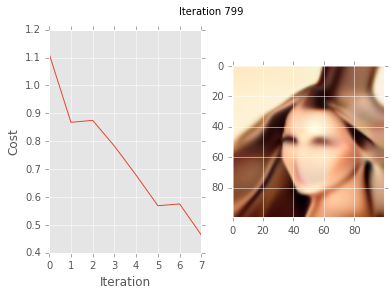

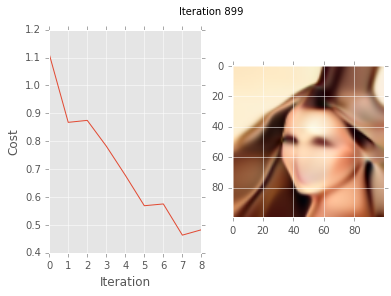

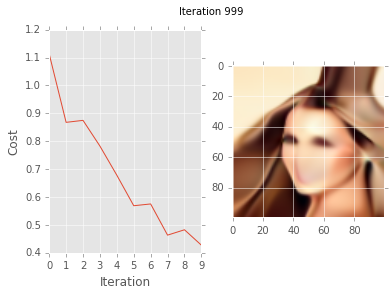

In [24]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

n_iterations = 1000
batch_size   = 200
sess = tf.Session()

# Initialize all your variables and run the operation with your session
sess.run(tf.initialize_all_variables())

# Optimize over a few iterations, each time following the gradient
# a little at a time
imgs     = []
costs    = []
gif_step = n_iterations // 10
step_i   = 0

for it_i in range(n_iterations):
    
    # Get a random sampling of the dataset
    idxs = np.random.permutation(range(len(xs)))
    
    # The number of batches we have to iterate over
    n_batches = len(idxs) // batch_size
    
    # Now iterate over our stochastic minibatches:
    for batch_i in range(n_batches):
         
        # Get just minibatch amount of data
        idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]

        # And optimize, also returning the cost so we can monitor
        # how our optimization is doing.
        training_cost = sess.run(
            [cost, optimizer],
            feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})[0]

    # Also, every 20 iterations, we'll draw the prediction of our
    # input xs, which should try to recreate our image!
    if (it_i + 1) % gif_step == 0:
        costs.append(training_cost / n_batches)
        ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
        img = np.clip(ys_pred.reshape(img.shape), 0, 1)
        imgs.append(img)
        # Plot the cost over time
        fig, ax = plt.subplots(1, 2)
        ax[0].plot(costs)
        ax[0].set_xlabel('Iteration')
        ax[0].set_ylabel('Cost')
        ax[1].imshow(img)
        fig.suptitle('Iteration {}'.format(it_i))
        plt.show()

In [20]:
"""Utility for creating a GIF.

Creative Applications of Deep Learning w/ Tensorflow.
Kadenze, Inc.
Copyright Parag K. Mital, June 2016.
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def build_gif(imgs, interval=0.1, dpi=72,
              save_gif=True, saveto='animation.gif',
              show_gif=False, cmap=None):
    """Take an array or list of images and create a GIF.

    Parameters
    ----------
    imgs : np.ndarray or list
        List of images to create a GIF of
    interval : float, optional
        Spacing in seconds between successive images.
    dpi : int, optional
        Dots per inch.
    save_gif : bool, optional
        Whether or not to save the GIF.
    saveto : str, optional
        Filename of GIF to save.
    show_gif : bool, optional
        Whether or not to render the GIF using plt.
    cmap : None, optional
        Optional colormap to apply to the images.

    Returns
    -------
    ani : matplotlib.animation.ArtistAnimation
        The artist animation from matplotlib.  Likely not useful.
    """
    imgs = np.asarray(imgs)
    h, w, c = imgs[0].shape
    fig, ax = plt.subplots(figsize=(np.round(w / dpi), np.round(h / dpi)))
    fig.subplots_adjust(bottom=0)
    fig.subplots_adjust(top=1)
    fig.subplots_adjust(right=1)
    fig.subplots_adjust(left=0)
    ax.set_axis_off()

    if cmap is not None:
        axs = list(map(lambda x: [
            ax.imshow(x, cmap=cmap)], imgs))
    else:
        axs = list(map(lambda x: [
            ax.imshow(x)], imgs))

    ani = animation.ArtistAnimation(
        fig, axs, interval=interval, repeat_delay=0, blit=False)

    if save_gif:
        try:
            ani.save(saveto, writer='imagemagick', dpi=dpi)
        except:
            print('You do not have imagemagick installed.\n\nOn OSX ' +
                  'you can install this by first installing homebrew: ' +
                  'http://brew.sh\nThen run: "brew install imagemagick".\n' +
                  'Windows users can obtain a binary installation here: ' +
                  'https://www.imagemagick.org/script/binary-releases.php\n' +
                  'And Linux users should be able to install imagemagick using ' +
                  'their package manager, e.g.: sudo apt-get install imagemagick.')

    if show_gif:
        plt.show()

    return ani


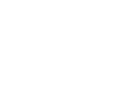

In [21]:
# Save the images as a GIF
_ = build_gif(imgs, saveto='single.gif', show_gif=False)

In [23]:
import IPython.display as ipyd
ipyd.Image(url='single.gif?{}'.format(np.random.rand()),
           height=500, width=500)

In [ ]:
|